# Particle Identification

In [10]:
import pickle
import numpy as np

from texat.detector.micromegas import STRIP_HEIGHT
from texat.units import units as u
from matplotlib import pyplot as plt

u.setup_matplotlib(True)

## Beam Tracks

The majority of signals formed in the MicroMeGaS belong to charge clusters liberated by the passage of {math}`{}^{10}C` beam ions within the TPC. Given the linear response between the signal formed on the anode and the energy deposited by the beam, it is possible to correlate the energy loss curve of the central MicroMeGaS pads region with a known stopping power curve of {math}`10C` within the TPC gas mixture. 

A 2D histogram of the measured charge against the pad row was computed across all events (see {numref}`stopping-power-beam-hist`). Superimposed over this distribution is the stopping power for the beam ions in the active target, indicated by the dashed line, as simulated by SRIM.{cite:ps}`ziegler_srim_2011` There are two loci clearly visible within the histogram, one of which lies at much lower charges than the other. The primary locus, that of the beam, coincides with the predicted stopping power curve, which has been displaced along the {math}`y` axis in order to treat the initial beam energy as an unknown. The Bragg peak, corresponding to the maximum stopping power of the {math}`{}^{10}C` ions, can be seen at row ~65. It follows that the beam is fully stopped in the active target, and any hits measured in the central silicon detectors originate from lighter particles which have sufficient energy to escape the chamber.

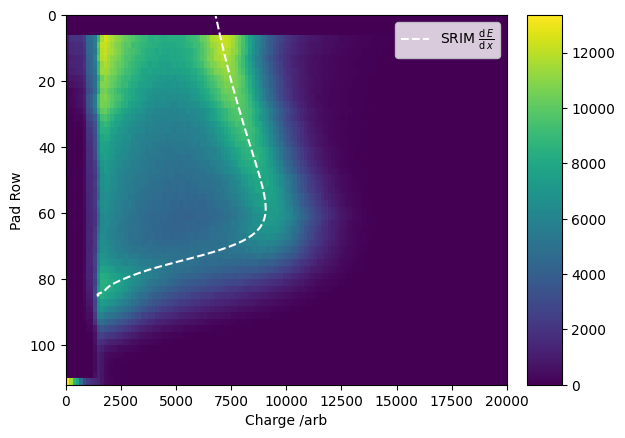

In [3]:
range_10c, de_dx_10c, ion_energy_10c = np.loadtxt(
    "data/10C-in-4He-CO2.csv", delimiter=",", unpack=True
)
range_10c = u.Quantity(range_10c, "cm")
de_dx_10c = u.Quantity(de_dx_10c, "MeV/cm")
ion_energy_10c = u.Quantity(ion_energy_10c, "MeV")

x = de_dx_10c.to("keV/cm").magnitude * 8.2  # e4
y = -43 + 128 - (range_10c.to("mm").magnitude / STRIP_HEIGHT)

with open("data/de-dx-beam.pickle", "rb") as f:
    dE_dx_hist = pickle.load(f)
dE_dx_hist.plot2d()
plt.plot(x, y, linestyle="--", color="white", label=r"SRIM $\frac{\mathrm{d}\,E}{\mathrm{d}\,x}$")
plt.legend();

The primary set of particles observed in the TPC are {math}`{}^{10}C`, {math}`{}^{1}H`, and {math}`{}^{4}He`. Each has a characteristic stopping power curve, as determined by SRIM

In [8]:
_, de_dx_4he, ion_energy_4he = np.loadtxt(
    "data/4He-in-4He-CO2.csv", delimiter=",", unpack=True
)

de_dx_4he = u.Quantity(de_dx_4he, "MeV/cm")
ion_energy_4he = u.Quantity(ion_energy_4he, "MeV")

_, de_dx_1h, ion_energy_1h = np.loadtxt(
    "data/1H-in-4He-CO2.csv", delimiter=",", unpack=True
)
de_dx_1h = u.Quantity(de_dx_1h, "MeV/cm")
ion_energy_1h = u.Quantity(ion_energy_1h, "MeV")

/home/angus/Git/phd-thesis/.direnv/python-3.10.6/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


NameError: name 'dE_dx_el' is not defined

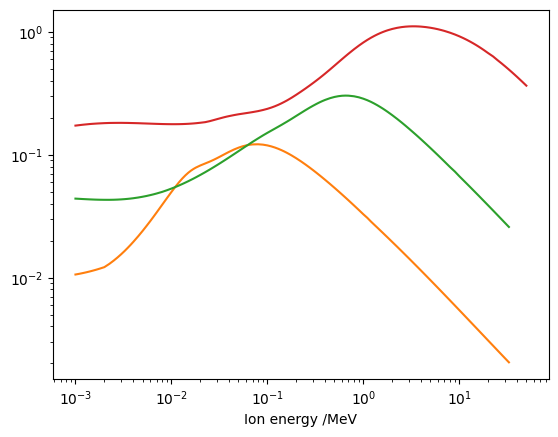

In [9]:
plt.figure()
plt.loglog(ion_energy_1h, de_dx_1h, "C1", label="${}^{1}H$")
plt.loglog(ion_energy_4he, de_dx_4he, "C2", label="${}^{4}He$")
plt.loglog(ion_energy_10c, de_dx_10c, "C3", label="${}^{10}C$")
plt.xlabel(f"Ion energy /{ion_energy_10c.units:~}")
plt.ylabel(f"Linear Stopping Power /{dE_dx_el.units:~}")
plt.legend();